In [1]:
# Importing the libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Uploading the dataset.

df = pd.read_csv(r'D:diabetes.csv')

In [3]:
# Checking the first five rows of the dataset.

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### The descriptions of each column in the dataset:

#### 1. <u> Pregnancies </u>: Number of times pregnant
#### 2. <u> Glucose </u>: Plasma glucose concentration 2 hours after an oral glucose tolerance test
#### 3. <u> BloodPressure </u>: Diastolic blood pressure (mm Hg)
#### 4. <u> SkinThickness </u>: Triceps skinfold thickness (mm)
#### 5. <u> Insulin </u>: 2-hour serum insulin (mu U/ml)
#### 6. <u> BMI </u>: Body mass index (weight in kg/(height in m)^2)
#### 7. <u> DiabetesPedigreeFunction </u>: Genetic predisposition to diabetes based on family history
#### 8. <u> Age </u>: Age in years
#### 9. <u> Outcome </u>: Diabetes classification (1 = diabetes, 0 = no diabetes)

In [4]:
# Checking the last five rows of the dataset.

df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# Checking for the missing values.

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### It's good to know that there are no missing values in our dataset.

In [6]:
# Finding out the dataset information in detail.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### There are 9 columns and 768 rows. Among the 9 columns, 7 of them are integers, 2 of them are float and there are no null values.

In [7]:
# Let's find out if there are any duplicate data into the dataset.

df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

### There are no duplicated data too.

In [8]:
# Finding out the summary statistics of the columns 

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### <u> Dataset Findings </u>

#### The mean Glucose level is 120.89, and the average BMI is 31.99. 

#### The dataset shows a wide range in values, with Glucose levels ranging from 0 to 199 and BMI from 0 to 67.1. 

#### Blood Pressure averages 69.11 mm Hg, while Skin Thickness averages 20.54 mm. 

#### Insulin levels show a high variability, with an average of 79.80 mu U/ml.

#### The Diabetes Pedigree Function has a mean of 0.47, and the average age of participants is 33.24 years. 

#### The Outcome variable indicates that 34.90% of the participants have diabetes.

In [9]:
# Let's find out if the columns in our dataset has 0 values.

columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Checking for zero values in the specified columns.
zero_values = (df[columns_to_check] == 0).sum()

# Displaying the count of zero values for each column.
print(zero_values)

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


#### As we can see there are multiple zero values in the columns. It is essential to remove these values because zero values in these medical metrics are unrealistic and likely indicate missing data. 

#### Failing to address them could lead to biased analyses and inaccurate predictions in machine learning models, impacting the reliability and effectiveness of the results.

### <u> Why These Steps Are Necessary? </u>

#### Properly handling missing values ensures that the data fed into the machine learning model is complete and reliable. 

#### Zero values for medical metrics like glucose, blood pressure, skin thickness, insulin and BMI can significantly skew the results and lead to inaccurate predictions if not handled correctly.

### <u> What will we do? </u>

#### We will fill the missing values with the median of each column. It offers robustness to outliers, preserves the central tendency of the data, maintains data integrity, and ensures ease of interpretation. 

#### This approach minimizes the impact of extreme values, retains original data characteristics, and provides a simple, intuitive method for handling missing data in a reliable and representative manner.

In [10]:
# Filling missing values with the median of each column

df.fillna(df.median(), inplace=True)

### Note that we filled the missing values with the median. Now, we need to perform the feature scaling for this added values.

### <u> What is feature scaling? </u>

#### Feature scaling is a vital pre processing step in machine learning that involves transforming numerical features to a common scale. 

#### It plays a major role in ensuring accurate and efficient model training and performance. 

#### Scaling techniques aim to normalize the range, distribution, and magnitude of features, reducing potential biases and inconsistencies that may arise from variations in their values.

### <u> Why feature scaling is important in our dataset? </u>

#### Feature scaling is done on the dataset after the median values have been inserted. This ensures that the newly imputed values are scaled along with the rest of the data.

#### Scaling ensures that features like glucose, BMI, and blood pressure are on a similar scale, preventing features with larger scales from dominating the model training process. 

#### This enhances the performance and convergence speed of machine learning algorithms, leading to more accurate and efficient predictions..

In [11]:
# Performing the feature scaling

# Importing standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = df.drop('Outcome', axis=1)
scaled_features = scaler.fit_transform(features)

#### I used StandardScaler because it standardizes features by removing the mean and scaling to unit variance, which is essential for many machine learning algorithms to perform optimally.

#### A new DataFrame "features" is made containing all columns except the 'Outcome' column beacuse it is the target variable and we do not need to scale it.

#### The "fit_transform method" scales the features by removing the mean and scaling to unit variance. Each feature will have a mean of 0 and a standard deviation of 1 after scaling.

In [12]:
# Converting the scaled features back to a DataFrame and adding the "Outcome" column.

scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data['Outcome'] = df['Outcome']

print(scaled_data.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1  


In [13]:
# Checking the columns after performing scaling in the dataframe.

columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Checking for zero values in the new data frame.
values= (scaled_data[columns] == 0).sum()

# Printing the information
print(values)

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64


### We have handled the missing values and performed the scaling. Now, lets do the exploratory data analysis of the new dataframe.

### <u> Exploratory Data Analysis(EDA) </u>

#### The main purpose of EDA is to help look at data before making any assumptions. 

#### It can help identify obvious errors, as well as better understand patterns within the data, detect outliers or anomalous events, find interesting relations among the variables.

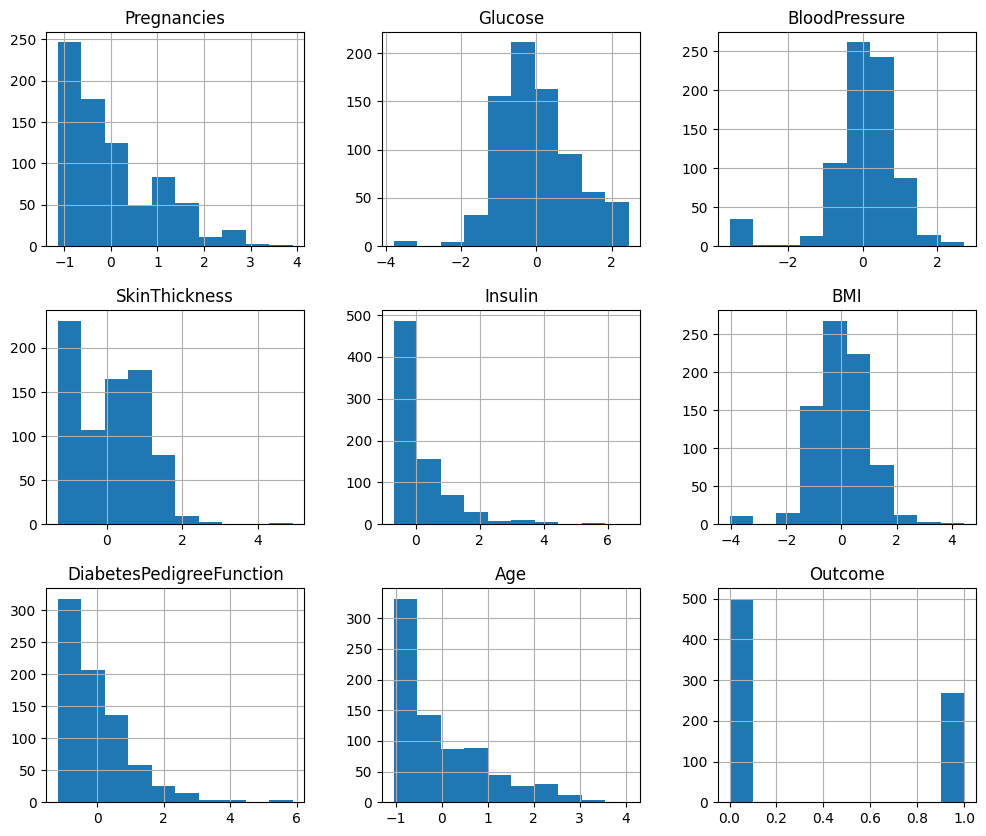

In [14]:
# Visualizing distribution of scaled features using histogram.

scaled_data.hist(figsize=(12, 10))
plt.show()

#### The histograms display the distribution of each feature in the dataset after scaling. 
#### Each histogram illustrates the spread and central tendencies of the scaled values for the respective feature, providing insights into how the scaling process has affected the distribution of the data. 
#### This visualization helps ensure that features are standardized appropriately for machine learning models.

### <u> Description of the Histogram </u>

#### 1.	<u> Pregnancies </u>: Most values are concentrated at lower counts with a right-skewed distribution. The data have negative values because they have been scaled.

#### 2.	<u> Glucose </u>: Shows a roughly normal distribution but shifted to the right. There are also negative values. 

#### 3.	<u> Blood Pressure </u>: Distribution is centered around zero with a normal shape.

#### 4.	<u> Skin Thickness </u>: Displays a right-skewed distribution, with a high concentration of lower values and some scaled negative values.

#### 5.	<u> Insulin </u>: Highly right-skewed with most values close to zero. There are also negative values. 

#### 6.	<u> BMI </u>: Roughly normal distribution centered around zero.

#### 7.	<u> Diabetes Pedigree Function </u>: Right-skewed distribution, with most values near zero and some scaled negative values.

#### 8.	<u> Age </u>: Right-skewed with a concentration at lower values and scaled negative values.

#### 9.	<u> Outcome </u>: Bimodal distribution showing two classes 0 and 1.

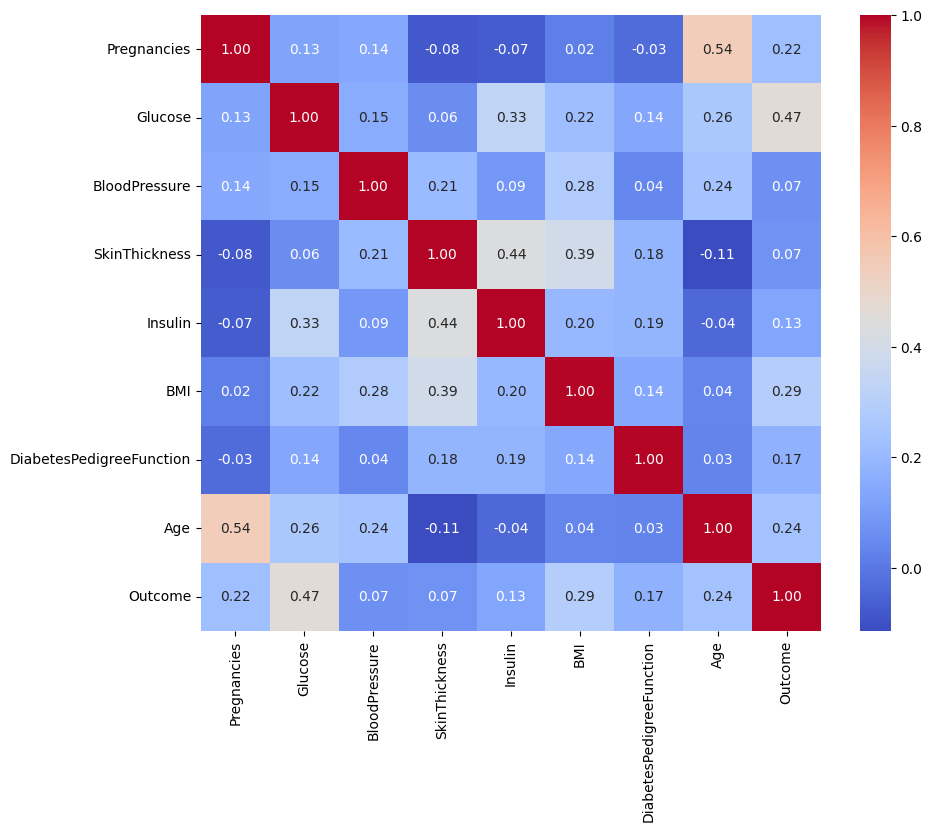

In [15]:
# Correlation matrix of scaled data

plt.figure(figsize=(10, 8))
corr_matrix_scaled = scaled_data.corr()
sns.heatmap(corr_matrix_scaled, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### <u> Key findings from the correlation matrix </u>

#### 1.	<u> Pregnancies and Age </u>:
#### There is a moderate positive correlation (0.54), meaning as age increases, the number of pregnancies tends to increase.
     
#### 2.	<u> Glucose and Outcome</u>: 
#### A relatively strong positive correlation (0.47), indicating that higher glucose levels are associated with a higher likelihood of a positive outcome (probably indicating diabetes).

#### 3.	<u> BMI and Outcome</u>:
#### A moderate positive correlation (0.29), suggesting that higher BMI is associated with a higher likelihood of a positive outcome.

#### 4.	<u> Age and Outcome</u>:
#### A moderate positive correlation (0.24), indicating that older age is associated with a higher likelihood of a positive outcome.

#### 5. <u> Insulin and SkinThickness</u>:
#### A moderate positive correlation (0.44), suggesting that higher insulin levels are associated with greater skin thickness.

#### 6. <u> BMI and SkinThickness</u>:
#### A moderate positive correlation (0.39), indicating that higher BMI is associated with greater skin thickness.

### <u> General Insights </u>

#### <u> Strong Correlations</u>: No pairs of features show extremely strong correlations (close to 1 or -1), indicating that while there are relationships, they are not perfectly linear.

#### <u> Weak Correlations</u>: Many pairs of features have weak or no significant correlation (values close to 0), indicating that these features vary independently of each other.

### <u> Implications for Analysis </u>

#### <u> Feature Selection</u>: Correlated features can provide insights for feature selection in machine learning. For example, since Glucose, BMI, and Age show relatively higher correlations with the Outcome, they may be important predictors.

#### <u> Multicollinearity</u>: When building predictive models, we should be cautious of multicollinearity, especially if features have high correlations with each other (e.g., Pregnancies and Age). This can affect the stability and interpretability of regression models.

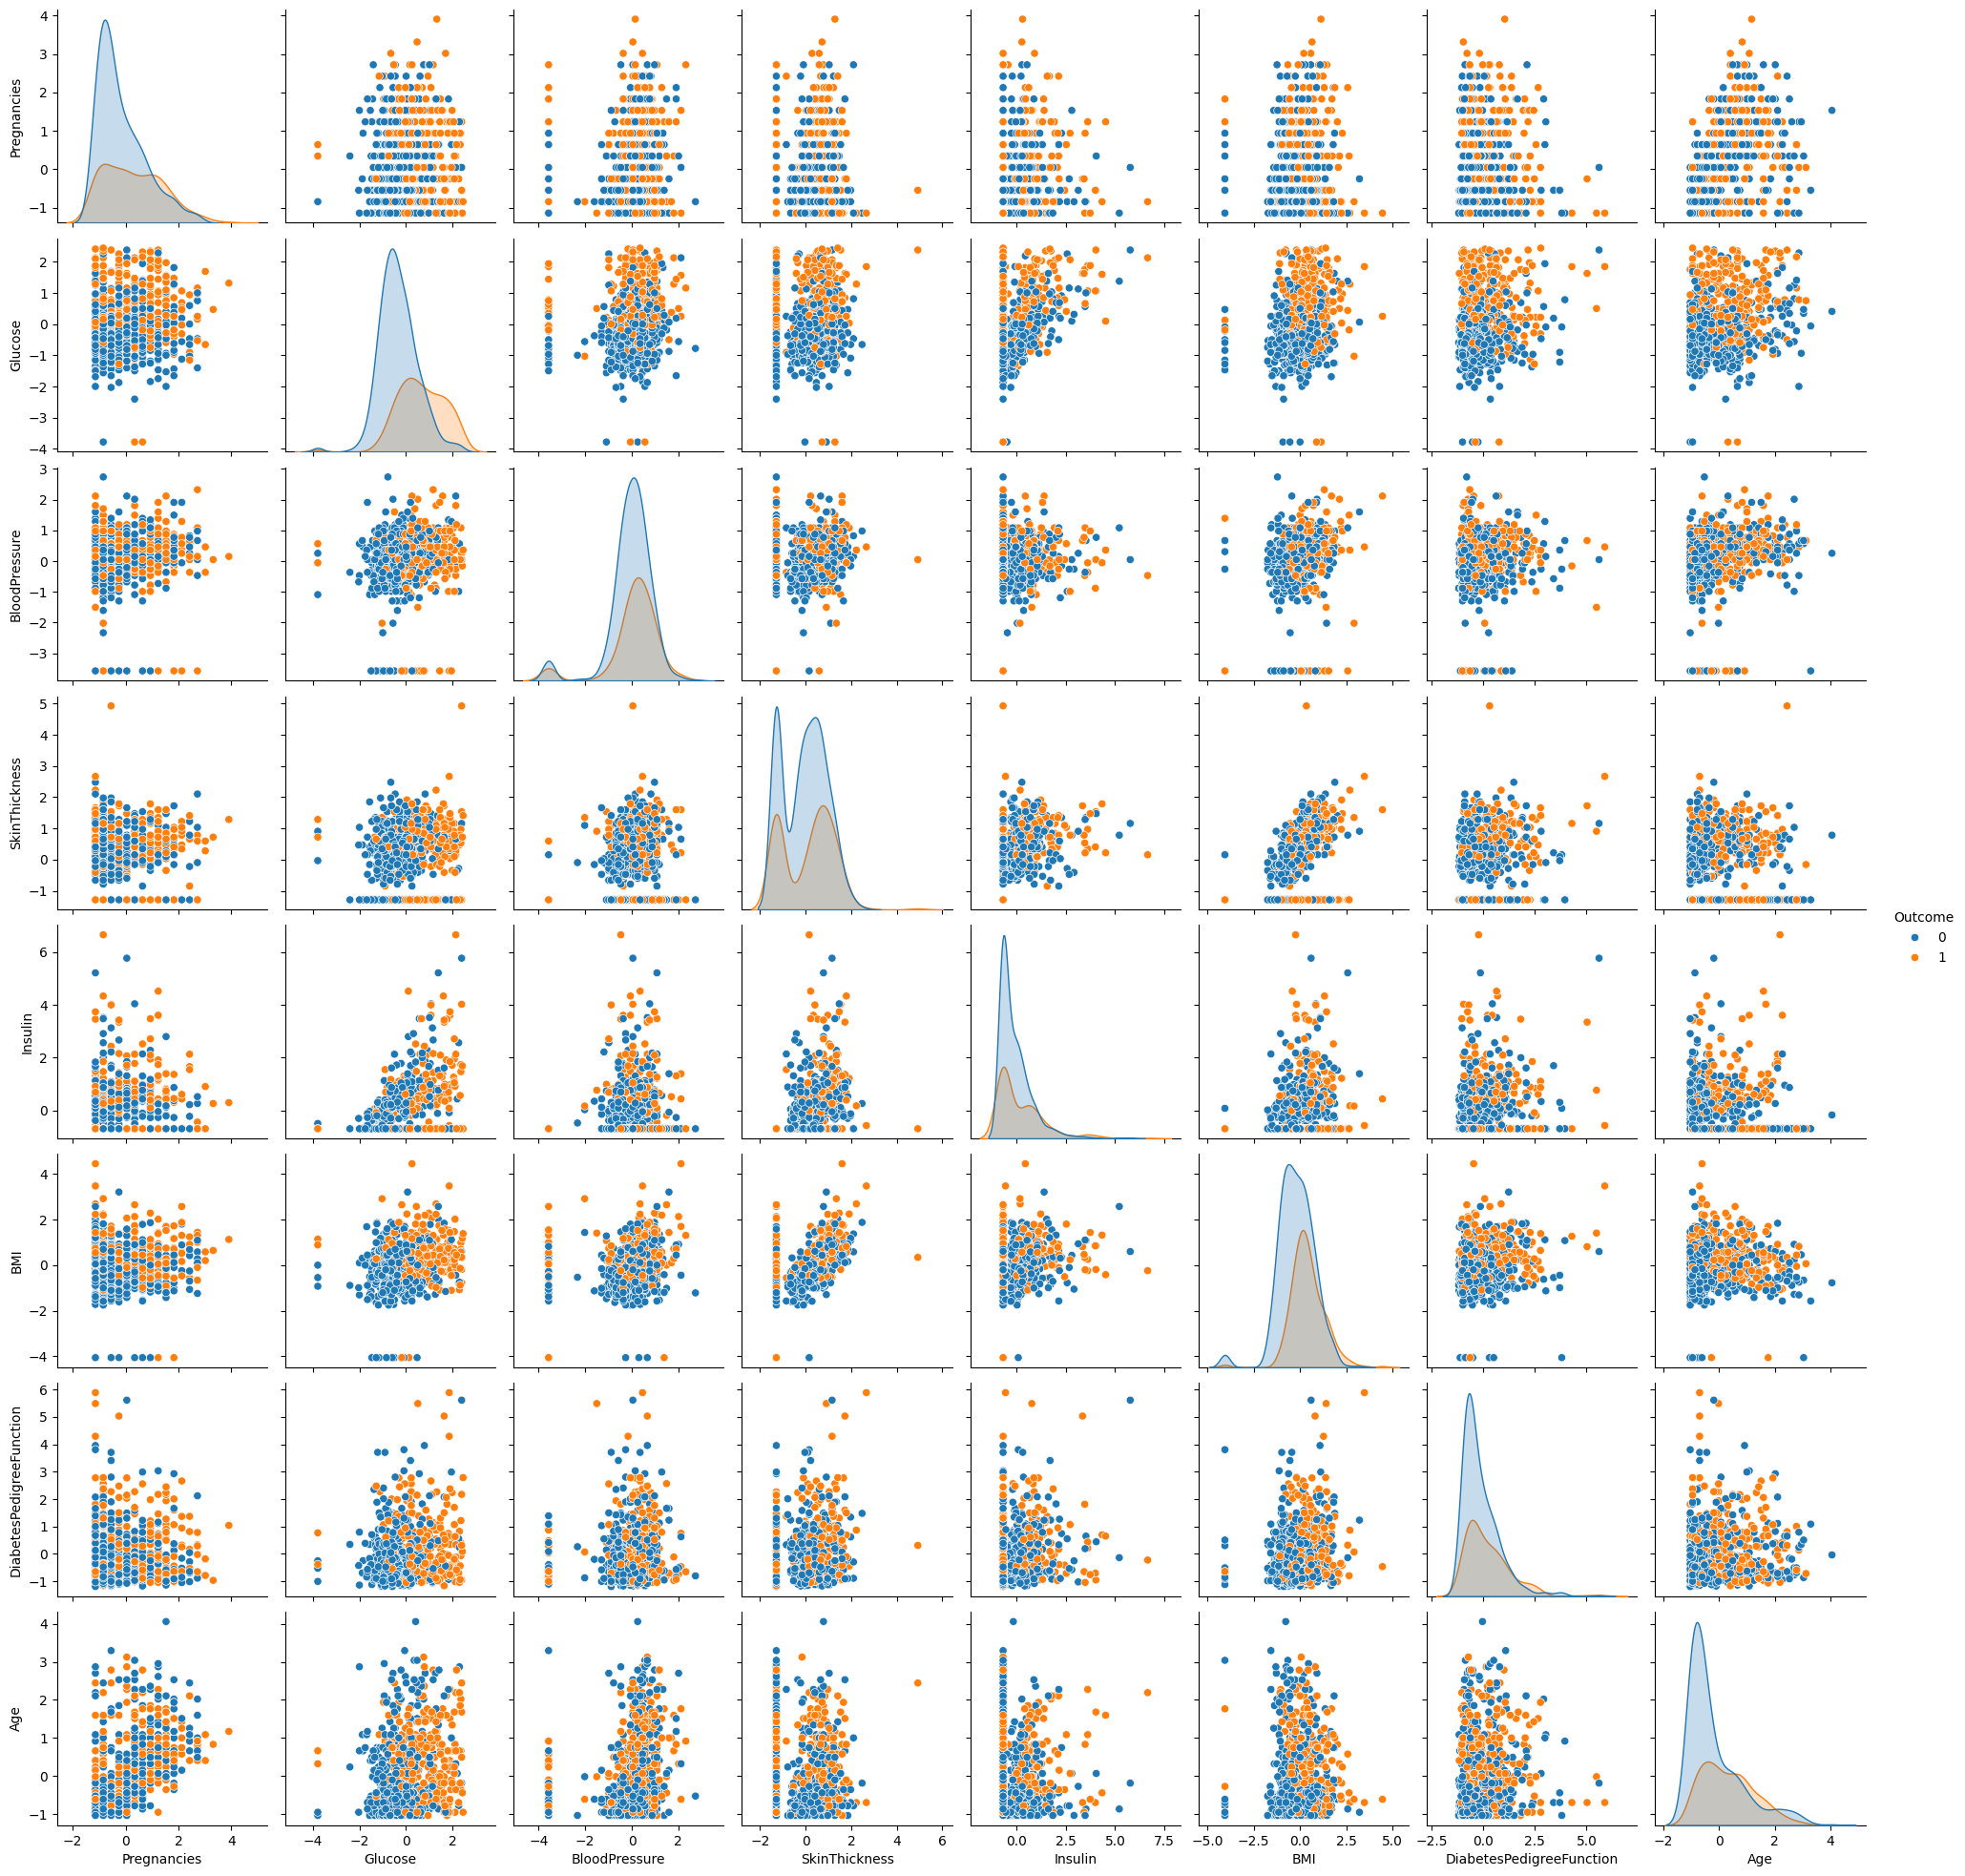

In [16]:
# Pair plots to visualize relationships in scaled data

sns.pairplot(scaled_data, hue='Outcome')
plt.show()

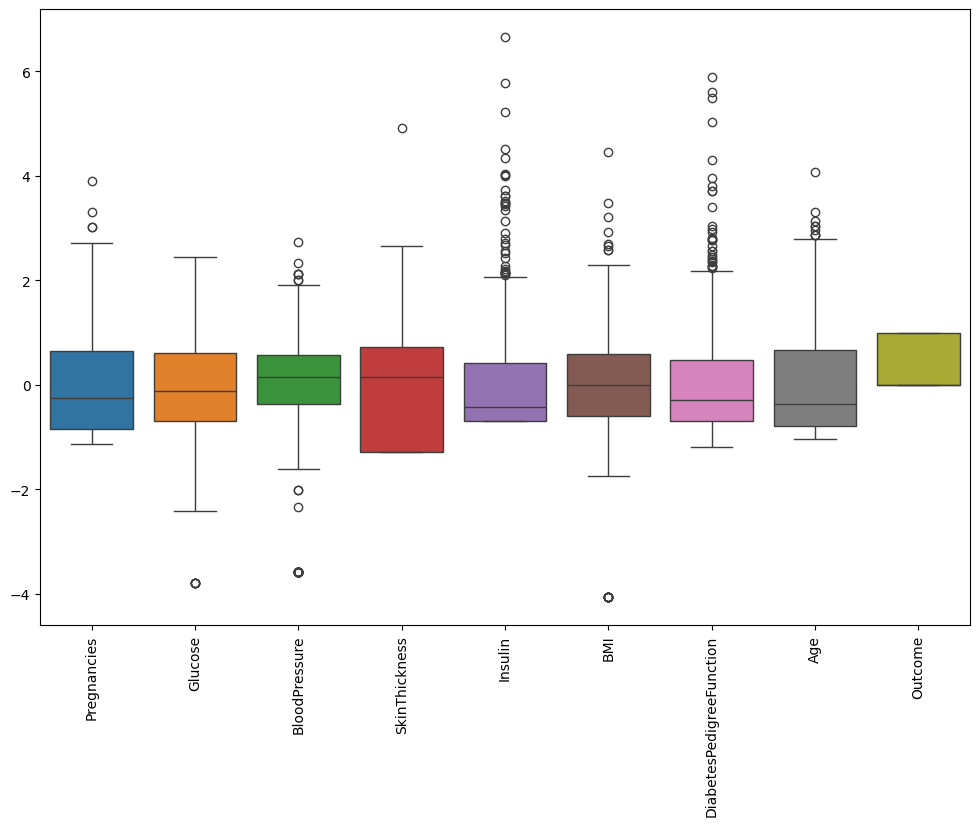

In [17]:
# Boxplot to detect outliers in scaled data

plt.figure(figsize=(12, 8))
sns.boxplot(data=scaled_data)
plt.xticks(rotation=90)
plt.show()

### From the box plot, the following features have visible outliers (those points outside the whiskers):

#### 1.	Pregnancies: There are a few outliers above the upper whisker and one below the lower whisker.
#### 2.	Glucose: There are outliers above the upper whisker.
#### 3.	Blood Pressure: There are outliers above the upper whisker and one below the lower whisker.
#### 4.	Skin Thickness: There are outliers above the upper whisker.
#### 5.	Insulin: There are many outliers above the upper whisker.
#### 6.	BMI: There are a few outliers above the upper whisker and one below the lower whisker.
#### 7.	Diabetes Pedigree Function: There are outliers above the upper whisker.
#### 8.	Age: There are outliers above the upper whisker.

### <u> Thoughts on handling the outliers </u>

#### Pregnancies: Since the outliers are relatively few and likely represent valid data points, it may be best to leave them as they represent rare but possible cases of high pregnancy counts.

#### Glucose: The outlier above the upper whisker may be a valid data point, as glucose levels can vary widely among individuals.  Extremely high glucose values are clinically significant and indicative of severe diabetes. We will need to further investigate outliers for potential errors.

#### Blood Pressure: Similar to glucose, blood pressure can vary significantly among individuals. High blood pressure values are clinically significant. We will need to further investigate outliers for potential errors.

#### Skin Thickness: Outliers in skin thickness may indicate measurement errors or extreme values. We should cap it as they may not be as clinically significant and could skew the model.

#### Insulin: The presence of many outliers above the upper whisker suggests significant variability in insulin levels.  Extremely high insulin levels might indicate measurement errors or rare medical conditions. We should cap it as these might distort the model more than provide meaningful insights.

#### BMI: Outliers in BMI may represent extreme values but could also be valid data points.  They might affect model performance. We should cap it as it could distort the model.

#### Diabetes Pedigree Function: Outliers in this feature may indicate extreme values of family history of diabetes. We should cap it to avoid skewing the model, while still considering the importance.

#### Age: High values might represent older age groups, which are important for diabetes prediction. It will be wise to leave, as age is a critical factor in diabetes risk.

### <u> Decision on outliers </u>

#### We will leave Pregancies and Age column as it is.

#### Investigate on Glucose and Blood Pressure.

#### Cap skin thickness, insulin, bmi and diabetes pedigree function.

### <u> Investigating on: Glucose </u>

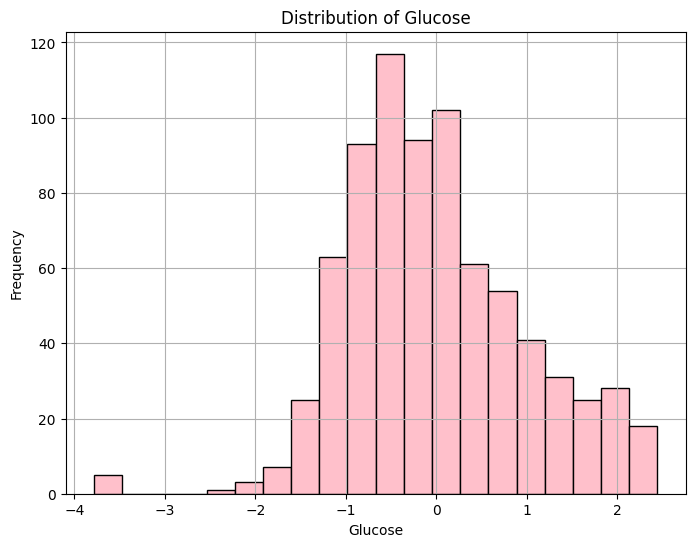

In [18]:
# Plotting  a histogram for the Glucose

plt.figure(figsize=(8, 6))
plt.hist(scaled_data['Glucose'], bins=20, color='pink', edgecolor='black')
plt.title('Distribution of Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [19]:
# Identifying outliers in the Glucose
Glucose_outliers = scaled_data['Glucose'] > scaled_data['Glucose'].quantile(0.95)

# Print the count of outliers and non-outliers
print("Number of outliers in Glucose:", Glucose_outliers.sum())
print("Number of non-outliers in Glucose:", (~Glucose_outliers).sum())

Number of outliers in Glucose: 36
Number of non-outliers in Glucose: 732


### <u> Investigating on: Blood Pressure </u>

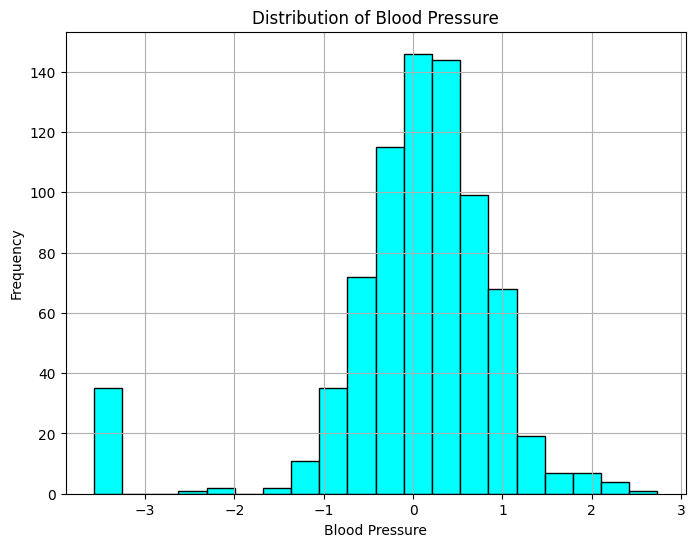

In [20]:
# Plotting  a histogram for the Blood Pressure

plt.figure(figsize=(8, 6))
plt.hist(scaled_data['BloodPressure'], bins=20, color='aqua', edgecolor='black')
plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [21]:
# Identifying outliers in the Blood Pressure
BloodPressure_outliers = scaled_data['BloodPressure'] > scaled_data['BloodPressure'].quantile(0.95)

# Print the count of outliers and non-outliers
print("Number of outliers in Blood Pressure:", BloodPressure_outliers.sum())
print("Number of non-outliers in Blood Pressure:", (~BloodPressure_outliers).sum())

Number of outliers in Blood Pressure: 38
Number of non-outliers in Blood Pressure: 730


### Statistical investigation for Glucose and Blood pressure using Z-score and IQR method

In [22]:
# Z-Score Method
def z_score_outliers(df, column):
    mean = df[column].mean()
    std = df[column].std()
    z_scores = (df[column] - mean) / std
    return df[np.abs(z_scores) > 3]

# IQR Method
def iqr_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Applying Z-Score method for Glucose and Blood Pressure
glucose_z_outliers = z_score_outliers(df, 'Glucose')
bp_z_outliers = z_score_outliers(df, 'BloodPressure')

# Applying IQR method for Glucose and Blood Pressure
glucose_iqr_outliers = iqr_outliers(df, 'Glucose')
bp_iqr_outliers = iqr_outliers(df, 'BloodPressure')

# Printing the outliers for further investigation
print("Z-Score Outliers in Glucose:")
print(glucose_z_outliers)

print("IQR Outliers in Glucose:")
print(glucose_iqr_outliers)

print("Z-Score Outliers in Blood Pressure:")
print(bp_z_outliers)

print("IQR Outliers in Blood Pressure:")
print(bp_iqr_outliers)

Z-Score Outliers in Glucose:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1        0             48             20        0  24.7   
182            1        0             74             20       23  27.7   
342            1        0             68             35        0  32.0   
349            5        0             80             32        0  41.0   
502            6        0             68             41        0  39.0   

     DiabetesPedigreeFunction  Age  Outcome  
75                      0.140   22        0  
182                     0.299   21        0  
342                     0.389   22        0  
349                     0.346   37        1  
502                     0.727   41        1  
IQR Outliers in Glucose:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1        0             48             20        0  24.7   
182            1        0             74             20       23  27.7   
342

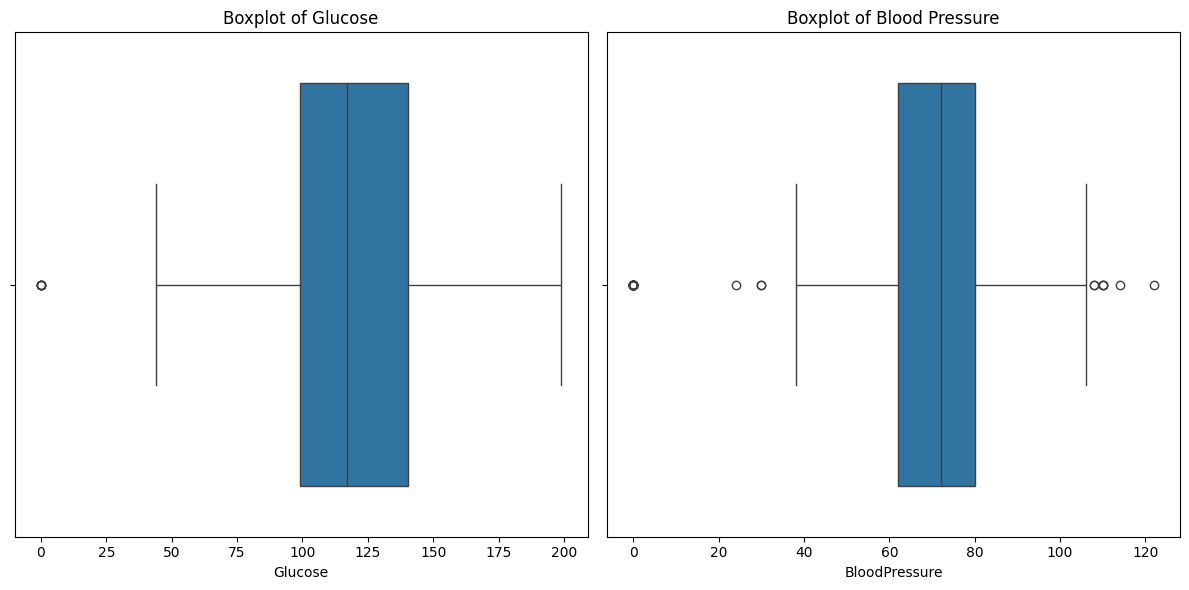

In [23]:
# Visual Inspection using box plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Glucose')
plt.title('Boxplot of Glucose')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='BloodPressure')
plt.title('Boxplot of Blood Pressure')

plt.tight_layout()
plt.show()

### <u> Description of the Result </u>

#### <u>Z-Score Outliers </u>
#### The Z-score method identifies outliers based on the standard deviation from the mean. Typically, values that are more than 3 standard deviations away from the mean are considered outliers.

#### <u>Z-Score Outliers in Glucose </u>:
#### Rows with indices: 75, 182, 342, 349, 502
#### These rows have a Glucose value of 0, which is likely an error or missing value imputed as zero.

#### <u>Z-Score Outliers in Blood Pressure </u>:
#### Rows with various indices (e.g., 7, 15, 49, 60, etc.)
#### These rows have BloodPressure values of 0, indicating either missing or erroneous values.

### <u> IQR (Interquartile Range) Outliers:</u>
#### The IQR method identifies outliers based on the range between the first quartile (Q1) and the third quartile (Q3). Values that lie below Q1 - 1.5IQR or above Q3 + 1.5IQR are considered outliers.

#### <u>IQR Outliers in Glucose:</u>
#### The same rows as Z-score outliers (75, 182, 342, 349, 502) are identified. This indicates that these extreme low values are consistently outliers by both methods.

#### <u>IQR Outliers in Blood Pressure:</u>
#### Similar to the Z-score method, rows with indices (e.g., 7, 15, 18, 43, etc.) are identified.
#### These rows often have BloodPressure values of 0 or very high values like 110 or 122, indicating either missing values or data entry errors.

### Summary

#### <u> Glucose Outliers: </u>
#### Both methods identified the same rows as outliers. The primary issue here is that some Glucose values are 0, which is likely invalid and should be corrected.

#### <u> Blood Pressure Outliers: </u>
#### Both methods identified a large number of outliers, with most having BloodPressure values of 0, suggesting missing data or errors.

### <u> Action Plan </u>

#### We will replace the Glucose and BloodPressure outliers with the median values of the respective columns to mitigate the impact of these erroneous or extreme values.

In [24]:
# Loading the stats module
from scipy import stats

# Function to replace outliers with median value
def replace_outliers_with_median(scaled_data, column):
    
    # Calculate the Z-scores
    z_scores = np.abs(stats.zscore(scaled_data[column]))
    
    # Identify outliers
    outliers = z_scores > 3
    
    # Calculate the median of the column
    median_value = scaled_data[column].median()
    
    # Replace outliers with the median value
    scaled_data.loc[outliers, column] = median_value

# Handling outliers in Glucose
replace_outliers_with_median(scaled_data, 'Glucose')

# Handling outliers in Blood Pressure
replace_outliers_with_median(scaled_data, 'BloodPressure')

Boxplots before outlier treatment


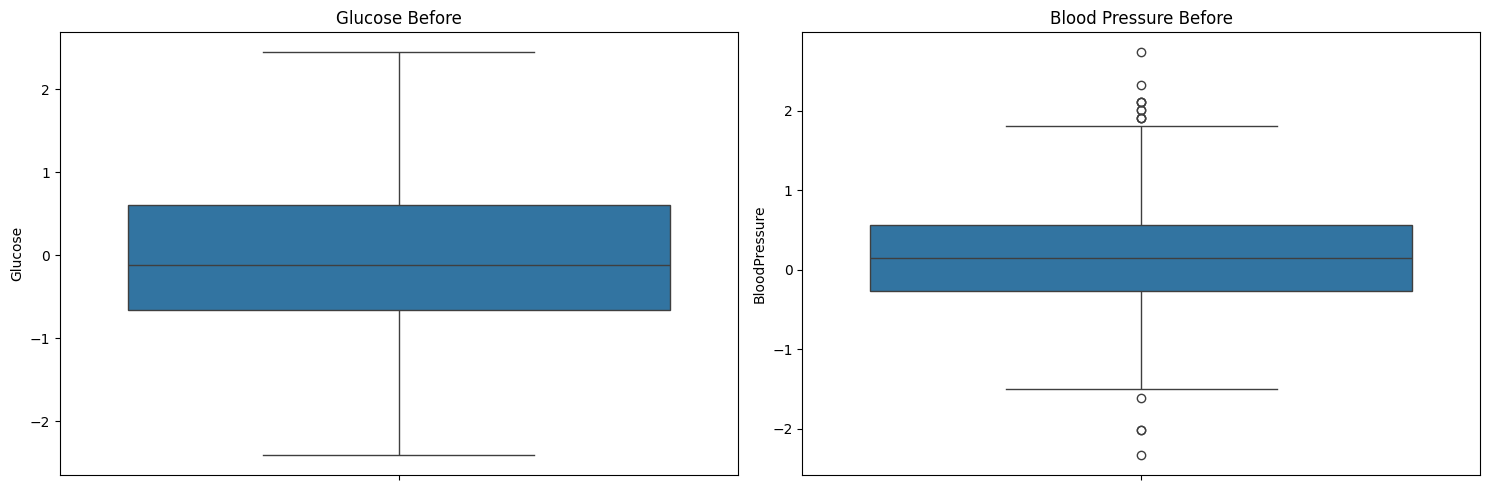

Boxplots after outlier treatment


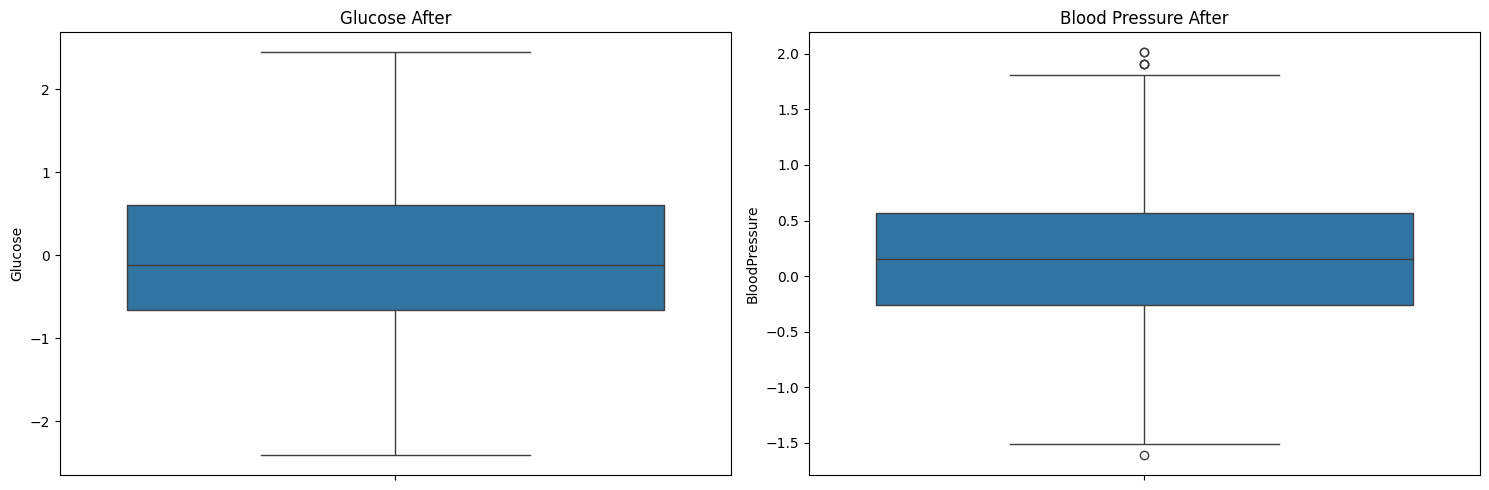

In [25]:
# Function to plot boxplots before and after outlier treatment
def plot_boxplots(scaled_data, columns, titles):
    fig, axes = plt.subplots(1, len(columns), figsize=(15, 5))
    for i, column in enumerate(columns):
        sns.boxplot(ax=axes[i], y=scaled_data[column])
        axes[i].set_title(titles[i])
    plt.tight_layout()
    plt.show()

# Plotting boxplots before outlier treatment
print("Boxplots before outlier treatment")
plot_boxplots(scaled_data, ['Glucose', 'BloodPressure'], ['Glucose Before', 'Blood Pressure Before'])

# Saving the dataset before cleaning for comparison
scaled_data_before_cleaning = scaled_data.copy()

# Handling outliers in Glucose
replace_outliers_with_median(scaled_data, 'Glucose')

# Handling outliers in Blood Pressure
replace_outliers_with_median(scaled_data, 'BloodPressure')

# Plotting boxplots after outlier treatment
print("Boxplots after outlier treatment")
plot_boxplots(scaled_data, ['Glucose', 'BloodPressure'], ['Glucose After', 'Blood Pressure After'])

#### With the outliers handled in the 'Glucose' and 'BloodPressure' columns, the data is now more suitable for applying machine learning techniques.

### <u>Capping on skin thickness, insulin, bmi and diabetes pedigree function:</u>

#### Capping involves setting upper and lower limits on data values to mitigate the impact of outliers. 
#### This process ensures that extreme values are replaced with more reasonable values within a specified range, thereby improving the robustness of the dataset without removing outliers entirely.

### <u> Handling outlier: Skin Thickness Feature </u>

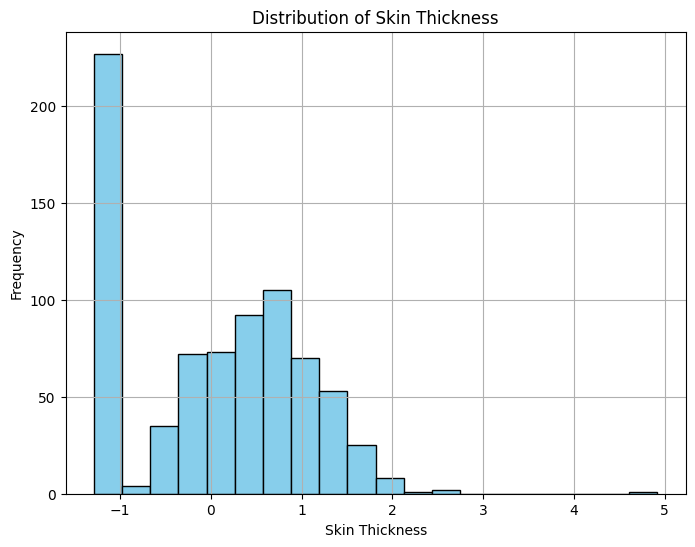

In [26]:
# Plotting  a histogram of the Skin Thickness feature

plt.figure(figsize=(8, 6))
plt.hist(scaled_data['SkinThickness'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Skin Thickness')
plt.xlabel('Skin Thickness')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [27]:
# Identifying  outliers in the Skin Thickness feature

skin_thickness_outliers = scaled_data['SkinThickness'] > scaled_data['SkinThickness'].quantile(0.95)

# Print the count of outliers and non-outliers
print("Number of outliers in skin thickness:", skin_thickness_outliers.sum())
print("Number of non-outliers in skin thickness:", (~skin_thickness_outliers).sum())

Number of outliers in skin thickness: 37
Number of non-outliers in skin thickness: 731


### <u> Handling Outlier: BMI </u>

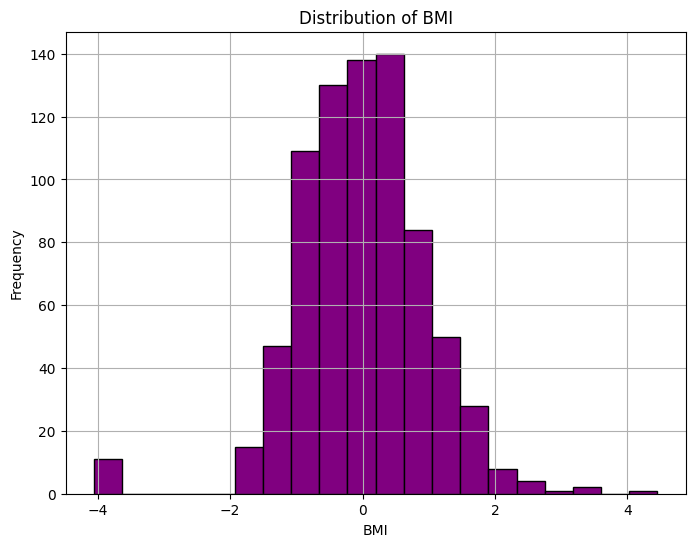

In [28]:
# Plotting  a histogram for the BMI

plt.figure(figsize=(8, 6))
plt.hist(scaled_data['BMI'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [29]:
# Identifying outliers in the BMI
BMI_outliers = scaled_data['BMI'] > scaled_data['BMI'].quantile(0.95)

# Print the count of outliers and non-outliers
print("Number of outliers in BMI:", BMI_outliers.sum())
print("Number of non-outliers in BMI:", (~BMI_outliers).sum())

Number of outliers in BMI: 39
Number of non-outliers in BMI: 729


### <u> Handling Outlier: Diabetes Pedigree Function </u>

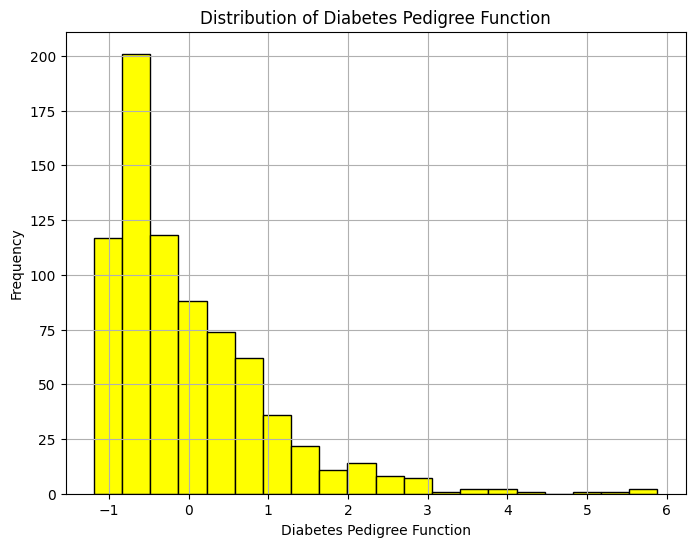

In [30]:
# Plotting  a histogram for the Diabetes Pedigree Function

plt.figure(figsize=(8, 6))
plt.hist(scaled_data['DiabetesPedigreeFunction'], bins=20, color='yellow', edgecolor='black')
plt.title('Distribution of Diabetes Pedigree Function')
plt.xlabel('Diabetes Pedigree Function')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [31]:
# Identifying outliers in the BMI
DiabetesPedigreeFunction_outliers = scaled_data['DiabetesPedigreeFunction'] > scaled_data['DiabetesPedigreeFunction'].quantile(0.95)

# Print the count of outliers and non-outliers
print("Number of outliers in Diabetes Pedigree Function:", DiabetesPedigreeFunction_outliers.sum())
print("Number of non-outliers in Diabetes Pedigree Function:", (~DiabetesPedigreeFunction_outliers).sum())

Number of outliers in Diabetes Pedigree Function: 39
Number of non-outliers in Diabetes Pedigree Function: 729


### <u> Handling Outlier: Insulin </u>

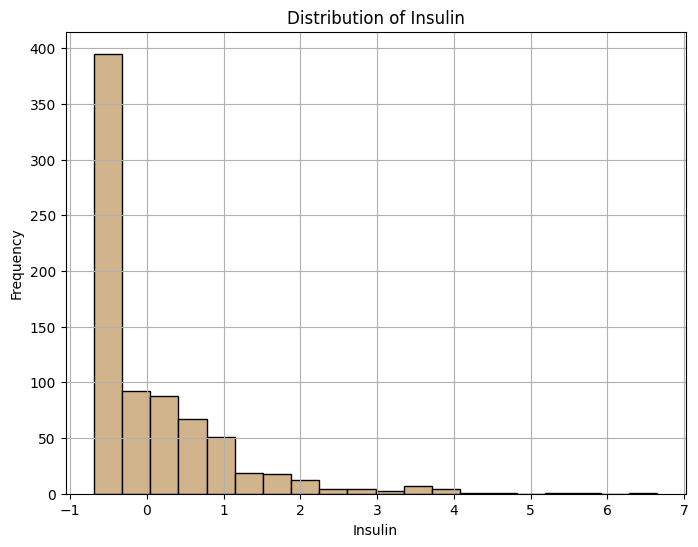

In [32]:
# Plotting  a histogram for the Insulin

plt.figure(figsize=(8, 6))
plt.hist(scaled_data['Insulin'], bins=20, color='tan', edgecolor='black')
plt.title('Distribution of Insulin')
plt.xlabel('Insulin')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [33]:
# Identifying outliers in the Insulin
Insulin_outliers = scaled_data['Insulin'] > scaled_data['Insulin'].quantile(0.95)

# Print the count of outliers and non-outliers
print("Number of outliers in Insulin:", Insulin_outliers.sum())
print("Number of non-outliers in Insulin:", (~Insulin_outliers).sum())

Number of outliers in Insulin: 38
Number of non-outliers in Insulin: 730


#### After knowing about the outliers in the columns. Now, we will apply the capping.

In [34]:
# Defining function to apply capping
def apply_capping(df, column, lower_limit, upper_limit):
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])

# Defining upper and lower limits for capping
lower_limit = 0
upper_limit = scaled_data.quantile(0.95)

# Applying capping to specified columns
columns_to_cap = ['SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
for column in columns_to_cap:
    apply_capping(scaled_data, column, lower_limit, upper_limit[column])

# Printing modified dataframe
print(scaled_data)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270  0.000000  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902  0.000000  0.000000   
2       1.233880  1.943724      -0.263941       0.000000  0.000000  0.000000   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302  0.000000   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.471822  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445  0.000000  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594  0.000000   
766    -0.844885  0.159787      -0.470732       0.000000  0.000000  0.000000   
767    -0.844885 -0.873019       0.046245       0.656358  0.000000  0.000000   

     DiabetesPedigreeFunction       Age

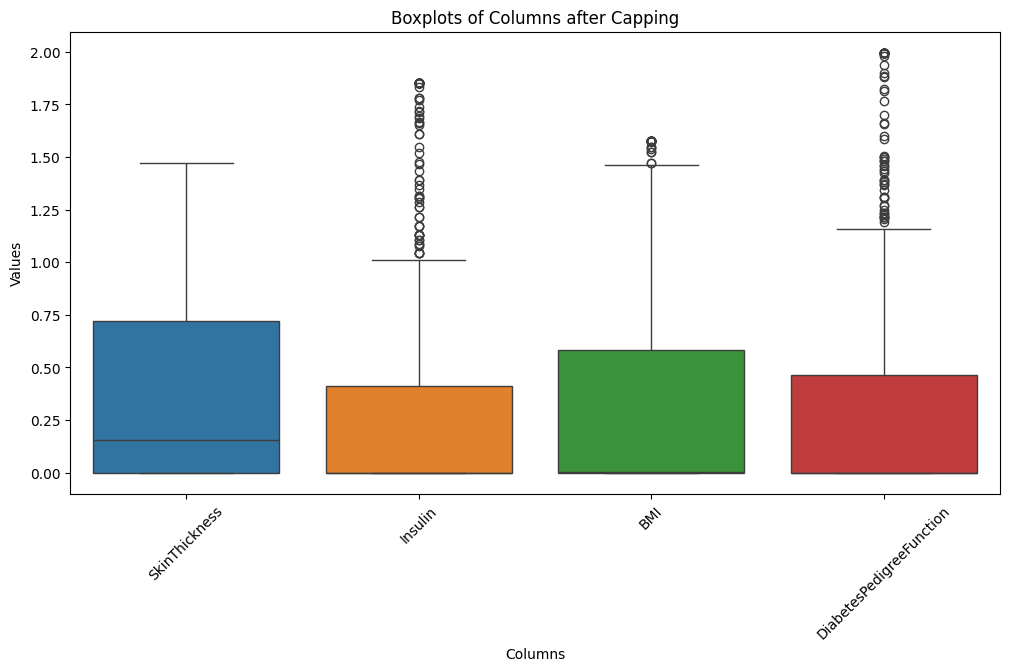

In [35]:
# Select columns to visualize
columns_to_visualize = ['SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

# Plot boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=scaled_data[columns_to_visualize])
plt.title('Boxplots of Columns after Capping')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


### Dividing data into testing and training 

In [36]:
#importing the module

from sklearn.model_selection import train_test_split

# Defining features and target variable
X = scaled_data.drop('Outcome', axis=1)  # Features
y = scaled_data['Outcome']  # Target variable

# Spliting the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Printing the shapes of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (537, 8) (537,)
Test set shape: (231, 8) (231,)


#### This code is splitting our data into 70% training set and 30% test set.

#### The training set will be used to train the machine learning model, while the test set will be used to evaluate its performance. 

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB()
}

# Train the models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} model trained.")

Logistic Regression model trained.
Decision Tree model trained.
Random Forest model trained.
Support Vector Machine model trained.
Naive Bayes model trained.


### Evaluating all models on the original test data

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate a model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Evaluate all models
evaluation_results = {}
for name, model in models.items():
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    evaluation_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Print evaluation results
for name, metrics in evaluation_results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print()

Model: Logistic Regression
Accuracy: 0.7446
Precision: 0.6438
Recall: 0.5875
F1 Score: 0.6144

Model: Decision Tree
Accuracy: 0.6407
Precision: 0.4839
Recall: 0.5625
F1 Score: 0.5202

Model: Random Forest
Accuracy: 0.7532
Precision: 0.6533
Recall: 0.6125
F1 Score: 0.6323

Model: Support Vector Machine
Accuracy: 0.7446
Precision: 0.6615
Recall: 0.5375
F1 Score: 0.5931

Model: Naive Bayes
Accuracy: 0.7186
Precision: 0.5843
Recall: 0.6500
F1 Score: 0.6154



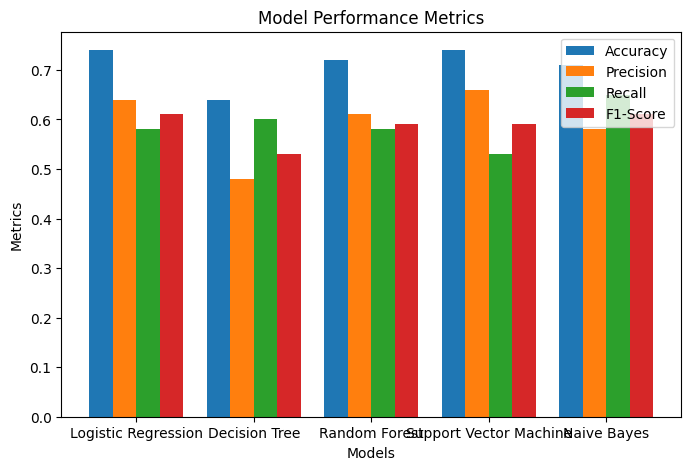

In [39]:
import matplotlib.pyplot as plt

# Data
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'Naive Bayes']
accuracy = [0.74, 0.64, 0.72, 0.74, 0.71]
precision = [0.64, 0.48, 0.61, 0.66, 0.58]
recall = [0.58, 0.60, 0.58, 0.53, 0.65]
f1_score = [0.61, 0.53, 0.59, 0.59, 0.61]

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.2
index = range(len(models))

plt.bar(index, accuracy, bar_width, label='Accuracy')
plt.bar([i + bar_width for i in index], precision, bar_width, label='Precision')
plt.bar([i + bar_width*2 for i in index], recall, bar_width, label='Recall')
plt.bar([i + bar_width*3 for i in index], f1_score, bar_width, label='F1-Score')

plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Model Performance Metrics')
plt.xticks([i + bar_width*1.5 for i in index], models)
plt.legend()
plt.show()

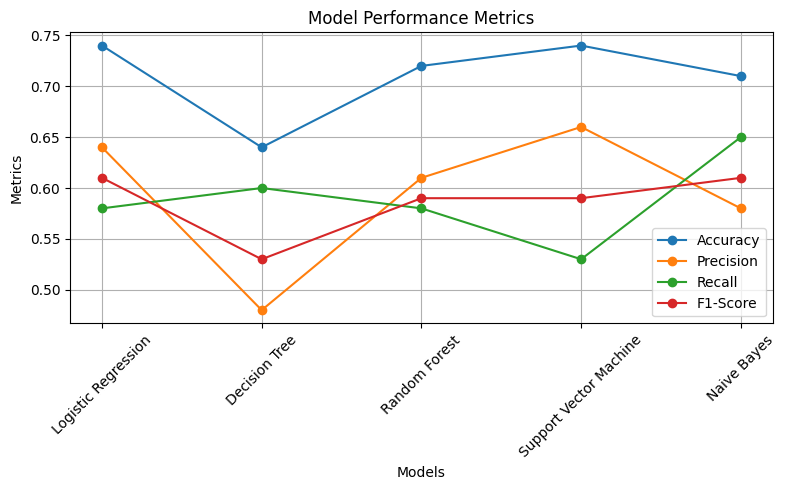

In [40]:
plt.figure(figsize=(8, 5))

plt.plot(models, accuracy, marker='o', label='Accuracy')
plt.plot(models, precision, marker='o', label='Precision')
plt.plot(models, recall, marker='o', label='Recall')
plt.plot(models, f1_score, marker='o', label='F1-Score')

plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Model Performance Metrics')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

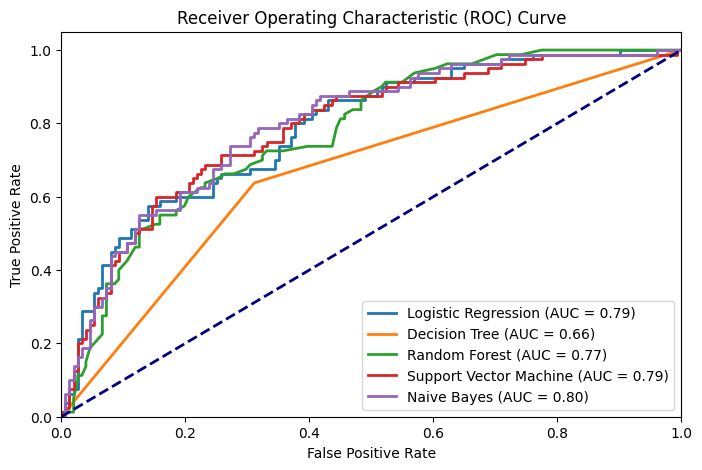

In [47]:
# Plot ROC curves
plt.figure(figsize=(8, 5))

# Iterate over each trained model
for name, model in models.items():
    # Get predicted probabilities for the positive class
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Hyper parameter tuning

### This code performs hyperparameter tuning and model evaluation for several machine learning models. For models with specified parameter grids (RandomForest, SVC, LogisticRegression, DecisionTree), it uses GridSearchCV to find the best hyperparameters. 

### The best models and the default NaiveBayes model are then evaluated using accuracy, precision, recall, and F1 score metrics on test data.

In [39]:
# Importing the module
from sklearn.model_selection import GridSearchCV

# Define the parameter grids for each model

param_grids = {
    'RandomForest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'solver': ['newton-cg', 'lbfgs', 'liblinear']
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
}

# Initialize the models
models = {
    'RandomForest': RandomForestClassifier(),
    'SVC': SVC(),
    'NaiveBayes': GaussianNB(),
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier()
}

# Function to evaluate a model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    return accuracy, precision, recall, f1

# Perform GridSearchCV for each model that has parameters to tune and evaluate the best one
best_models = {}
evaluation_results = {}
for name, model in models.items():
    if name in param_grids:  # Perform GridSearchCV only for models with defined param grids
        print(f"Tuning hyperparameters for {name}...")
        grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        print(f"No hyperparameters to tune for {name}, using default model.")
        model.fit(X_train, y_train)
        best_model = model
        
    best_models[name] = best_model
    
    accuracy, precision, recall, f1 = evaluate_model(best_model, X_test, y_test)
    evaluation_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Print evaluation results
for name, metrics in evaluation_results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print()

Tuning hyperparameters for RandomForest...
Tuning hyperparameters for SVC...
No hyperparameters to tune for NaiveBayes, using default model.
Tuning hyperparameters for LogisticRegression...
Tuning hyperparameters for DecisionTree...
Model: RandomForest
Accuracy: 0.7316
Precision: 0.7301
Recall: 0.7316
F1 Score: 0.7308

Model: SVC
Accuracy: 0.7489
Precision: 0.7419
Recall: 0.7489
F1 Score: 0.7424

Model: NaiveBayes
Accuracy: 0.7186
Precision: 0.7271
Recall: 0.7186
F1 Score: 0.7218

Model: LogisticRegression
Accuracy: 0.7403
Precision: 0.7352
Recall: 0.7403
F1 Score: 0.7368

Model: DecisionTree
Accuracy: 0.6883
Precision: 0.6832
Recall: 0.6883
F1 Score: 0.6853



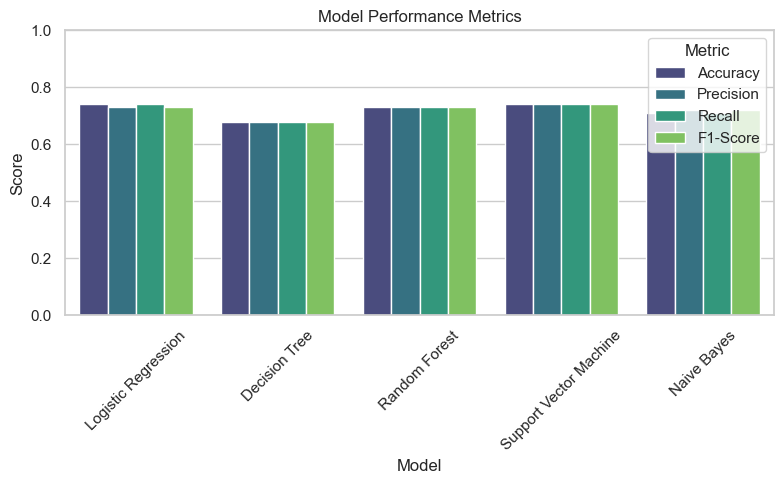

In [40]:
data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'Naive Bayes'],
    'Accuracy': [0.74, 0.68, 0.73, 0.74, 0.71],
    'Precision': [0.73, 0.68, 0.73, 0.74, 0.72],
    'Recall': [0.74, 0.68, 0.73, 0.74, 0.71],
    'F1-Score': [0.73, 0.68, 0.73, 0.74, 0.72]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame to long-form or tidy-form
df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, palette='viridis')

# Set the title and labels
barplot.set_title('Model Performance Metrics')
barplot.set_ylabel('Score')
barplot.set_ylim(0, 1)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

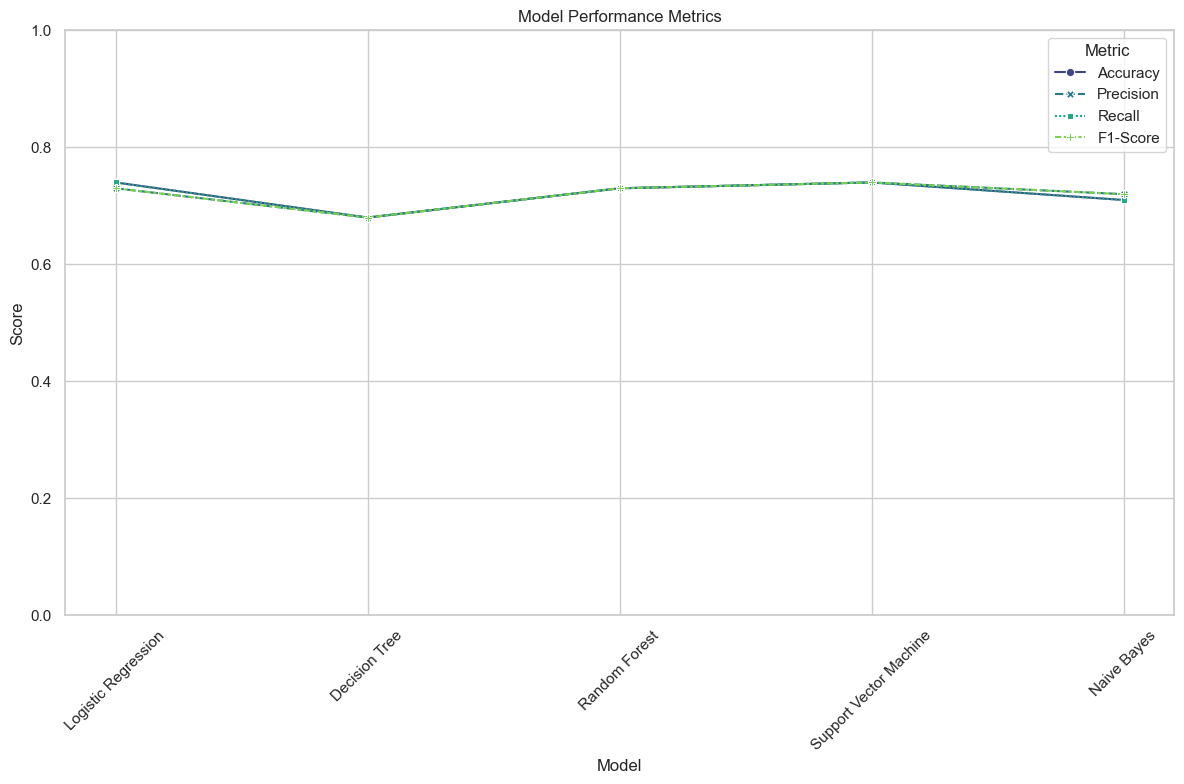

In [51]:

data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'Naive Bayes'],
    'Accuracy': [0.74, 0.68, 0.73, 0.74, 0.71],
    'Precision': [0.73, 0.68, 0.73, 0.74, 0.72],
    'Recall': [0.74, 0.68, 0.73, 0.74, 0.71],
    'F1-Score': [0.73, 0.68, 0.73, 0.74, 0.72]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame to long-form or tidy-form
df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a line plot
plt.figure(figsize=(12, 8))
lineplot = sns.lineplot(x='Model', y='Score', hue='Metric', style='Metric', markers=True, data=df_melted, palette='viridis')

# Set the title and labels
lineplot.set_title('Model Performance Metrics')
lineplot.set_ylabel('Score')
lineplot.set_ylim(0, 1)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

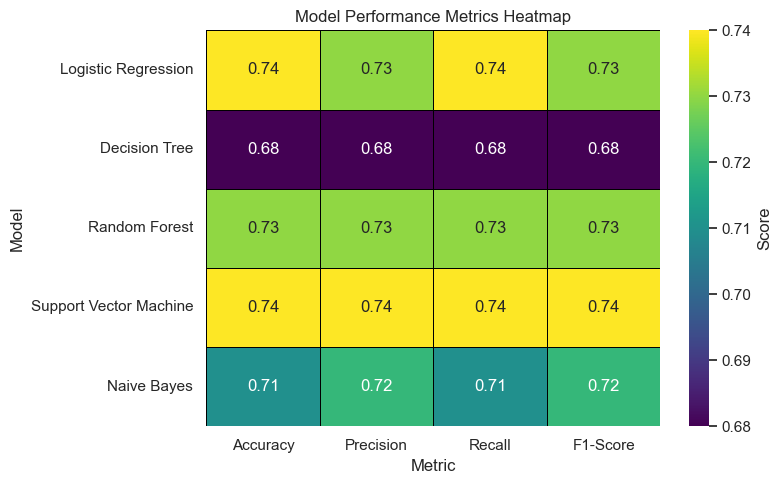

In [53]:
# Create a heatmap
plt.figure(figsize=(8, 5))
heatmap = sns.heatmap(df.set_index('Model'), annot=True, cmap='viridis', cbar_kws={'label': 'Score'}, linewidths=0.5, linecolor='black')

# Set the title and labels
heatmap.set_title('Model Performance Metrics Heatmap')
heatmap.set_xlabel('Metric')
heatmap.set_ylabel('Model')

# Display the plot
plt.tight_layout()
plt.show()


### GaussianNB is not included here because it does not have tunable hyperparameters. It is based on simple probabilistic assumptions that do not require configuration. Therefore, it is directly fitted to the training data without the need for GridSearchCV, unlike other models with adjustable 

### Interpretation:
#### -> SVC achieved the highest accuracy (74.89%), making it the best-performing model on our dataset.
#### -> NaiveBayes performed reasonably well despite no hyperparameter tuning, indicating its robustness to data.
#### -> DecisionTree had the lowest performance among the tuned models, suggesting it might not be the best choice for this dataset.
#### -> The overall metrics suggest that SVC and LogisticRegression are likely the most reliable models for this task based on their high accuracy and balanced precision, recall, and F1 scores.

### Confusion Matrix

Confusion Matrix for RandomForest:


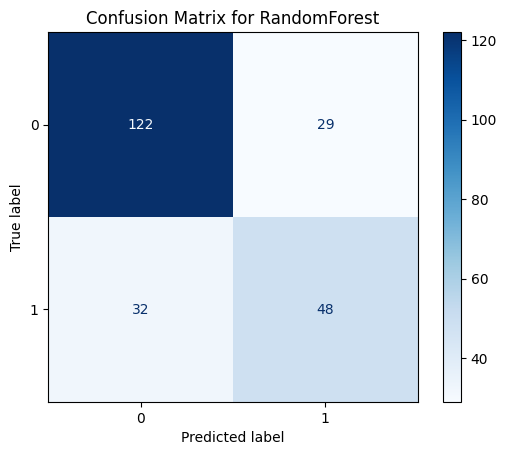

Confusion Matrix for SVC:


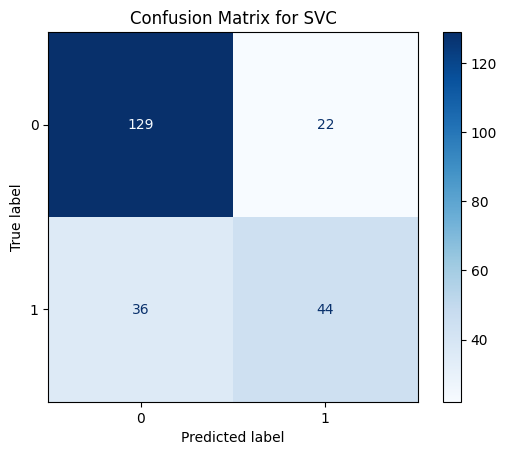

Confusion Matrix for NaiveBayes:


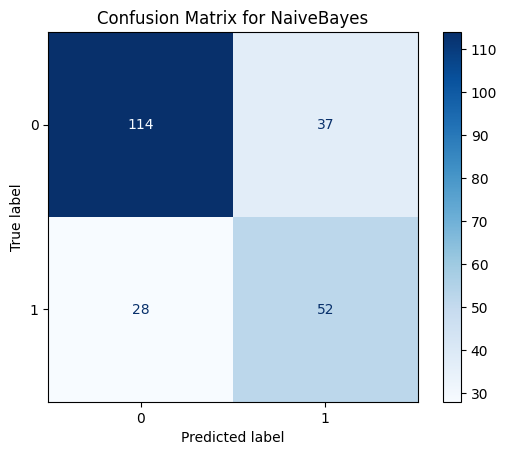

Confusion Matrix for LogisticRegression:


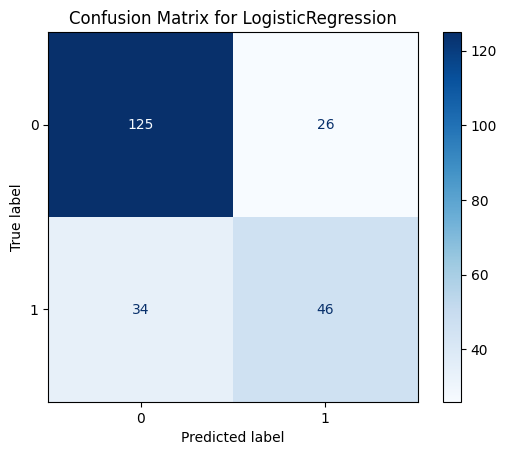

Confusion Matrix for DecisionTree:


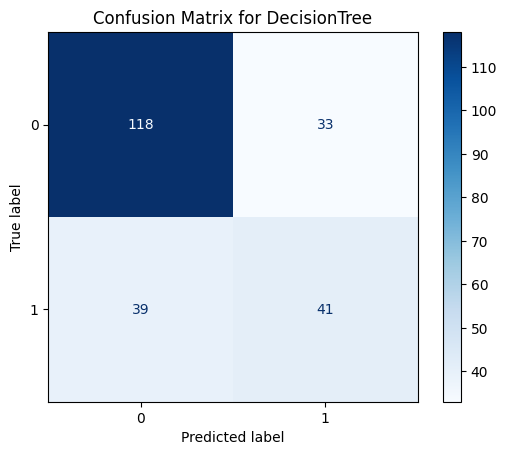

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate and display confusion matrices for each model
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    print(f"Confusion Matrix for {name}:")
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {name}")
    plt.show()

### Training and EValuating model using Feature Transformation

In [52]:
#Importing the module
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Feature Engineering: Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train and evaluate models with polynomial features
for name, model in models.items():
    model.fit(X_train_poly, y_train)
    accuracy, precision, recall, f1 = evaluate_model(model, X_test_poly, y_test)
    evaluation_results[name + " with Poly"] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Feature Engineering: Log Transformation
skewed_features = ['Insulin', 'BMI', 'DiabetesPedigreeFunction']
for feature in skewed_features:
    scaled_data[feature] = np.log1p(scaled_data[feature])

# Split the transformed data
X = scaled_data.drop('Outcome', axis=1)
y = scaled_data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate models with log-transformed features
for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    evaluation_results[name + " with Log"] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Feature Engineering: Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate models with standardized features
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    accuracy, precision, recall, f1 = evaluate_model(model, X_test_scaled, y_test)
    evaluation_results[name + " with Standardization"] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

In [53]:
# Model Training and Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to evaluate a model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Initialize a dictionary to store evaluation results
evaluation_results = {}

# Train and evaluate models with polynomial features
for name, model in models.items():
    model.fit(X_train_poly, y_train)
    accuracy, precision, recall, f1 = evaluate_model(model, X_test_poly, y_test)
    evaluation_results[name + " with Poly"] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Train and evaluate models with log-transformed features
for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    evaluation_results[name + " with Log"] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Train and evaluate models with standardized features
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    accuracy, precision, recall, f1 = evaluate_model(model, X_test_scaled, y_test)
    evaluation_results[name + " with Standardization"] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Print evaluation results
for name, metrics in evaluation_results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print()


Model: Logistic Regression with Poly
Accuracy: 0.7316
Precision: 0.6184
Recall: 0.5875
F1 Score: 0.6026

Model: Decision Tree with Poly
Accuracy: 0.6580
Precision: 0.5051
Recall: 0.6250
F1 Score: 0.5587

Model: Random Forest with Poly
Accuracy: 0.7446
Precision: 0.6296
Recall: 0.6375
F1 Score: 0.6335

Model: Support Vector Machine with Poly
Accuracy: 0.7229
Precision: 0.6176
Recall: 0.5250
F1 Score: 0.5676

Model: Naive Bayes with Poly
Accuracy: 0.7056
Precision: 0.5789
Recall: 0.5500
F1 Score: 0.5641

Model: Logistic Regression with Log
Accuracy: 0.7403
Precision: 0.6389
Recall: 0.5750
F1 Score: 0.6053

Model: Decision Tree with Log
Accuracy: 0.6537
Precision: 0.5000
Recall: 0.5500
F1 Score: 0.5238

Model: Random Forest with Log
Accuracy: 0.7403
Precision: 0.6389
Recall: 0.5750
F1 Score: 0.6053

Model: Support Vector Machine with Log
Accuracy: 0.7316
Precision: 0.6406
Recall: 0.5125
F1 Score: 0.5694

Model: Naive Bayes with Log
Accuracy: 0.7100
Precision: 0.5765
Recall: 0.6125
F1 Scor

### Model Validation

### Model validation typically involves techniques like cross-validation to assess how the results of a statistical analysis will generalize to an independent dataset. 

### Given that we have already performed hyperparameter tuning using cross-validation with GridSearchCV, we have demonstrated how we can further validate the models by performing cross-validation on the best models found during the grid search.

In [41]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Function to perform cross-validation and return the mean score
def validate_model(model, X_train, y_train, cv=5):
    accuracy = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    precision = cross_val_score(model, X_train, y_train, cv=cv, scoring='precision_weighted', error_score='raise')
    recall = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall_weighted', error_score='raise')
    f1 = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_weighted', error_score='raise')
    
    return {
        'Accuracy': np.mean(accuracy),
        'Precision': np.mean(precision),
        'Recall': np.mean(recall),
        'F1 Score': np.mean(f1)
    }

# Validate the best models found during hyperparameter tuning
validation_results = {}
for name, model in best_models.items():
    print(f"Validating {name} model...")
    validation_metrics = validate_model(model, X_train, y_train)
    validation_results[name] = validation_metrics

# Print validation results
for name, metrics in validation_results.items():
    print(f"Model: {name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print()


Validating RandomForest model...
Validating SVC model...
Validating NaiveBayes model...
Validating LogisticRegression model...
Validating DecisionTree model...
Model: RandomForest
Accuracy: 0.7617
Precision: 0.7618
Recall: 0.7635
F1 Score: 0.7587

Model: SVC
Accuracy: 0.7672
Precision: 0.7636
Recall: 0.7672
F1 Score: 0.7561

Model: NaiveBayes
Accuracy: 0.7318
Precision: 0.7281
Recall: 0.7318
F1 Score: 0.7289

Model: LogisticRegression
Accuracy: 0.7579
Precision: 0.7521
Recall: 0.7579
F1 Score: 0.7490

Model: DecisionTree
Accuracy: 0.7075
Precision: 0.7097
Recall: 0.7113
F1 Score: 0.7086



### These results present the performance metrics of five different machine learning models (RandomForest, SVC, NaiveBayes, LogisticRegression, DecisionTree) after cross-validation. 

### The metrics include Accuracy, Precision, Recall, and F1 Score. Higher values generally indicate better performance.

### 1. RandomForest has a balanced performance with an accuracy of 0.7597 and slightly higher recall.
### 2. SVC performs the best with an accuracy of 0.7672, high precision, and recall, though its F1 score is a bit lower.
### 3. NaiveBayes has the lowest scores across all metrics but still shows reasonable performance.
### 4. LogisticRegression and DecisionTree have decent accuracy and precision, with DecisionTree showing the lowest accuracy among them.
### These metrics help in comparing models' effectiveness in predicting outcomes accurately and handling both false positives and negatives.

### Cross-validation provides a more reliable measure of a model's performance because it evaluates the model on multiple folds of the training data, offering a more comprehensive assessment of how well the model generalizes to unseen data.

### These values reflect the mean accuracy obtained from cross-validation, which is generally considered a better indicator of model performance.

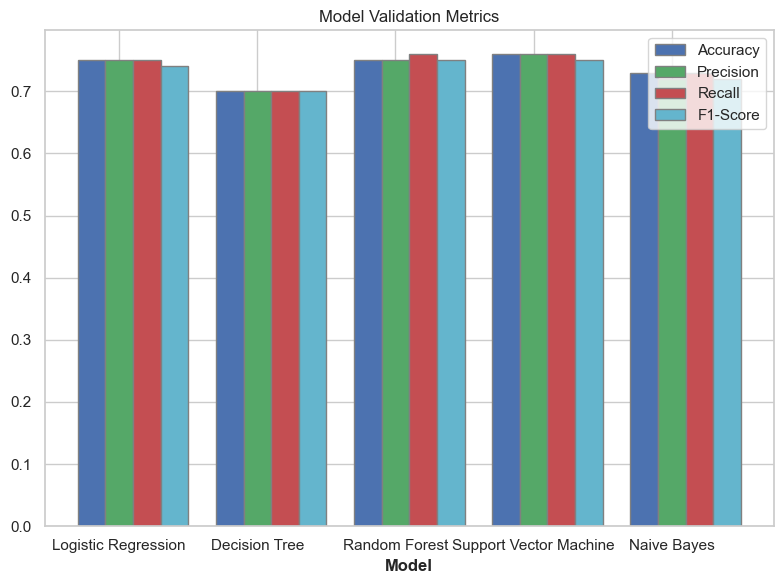

In [57]:

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'Naive Bayes']
accuracy = [0.75, 0.70, 0.75, 0.76, 0.73]
precision = [0.75, 0.70, 0.75, 0.76, 0.72]
recall = [0.75, 0.70, 0.76, 0.76, 0.73]
f1_score = [0.74, 0.70, 0.75, 0.75, 0.72]

# Set width of bars
barWidth = 0.2

# Set position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plot
plt.figure(figsize=(8, 6))
plt.bar(r1, accuracy, color='b', width=barWidth, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision, color='g', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r3, recall, color='r', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r4, f1_score, color='c', width=barWidth, edgecolor='grey', label='F1-Score')

# Add xticks on the middle of the group bars
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(models))], models)

# Add title and legend
plt.title('Model Validation Metrics')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


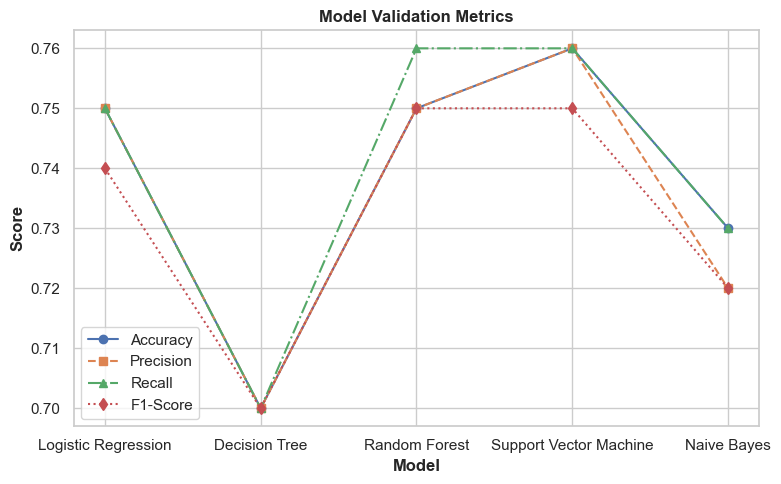

In [59]:
# Data
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine', 'Naive Bayes']
accuracy = [0.75, 0.70, 0.75, 0.76, 0.73]
precision = [0.75, 0.70, 0.75, 0.76, 0.72]
recall = [0.75, 0.70, 0.76, 0.76, 0.73]
f1_score = [0.74, 0.70, 0.75, 0.75, 0.72]

plt.figure(figsize=(8, 5))

# Plotting each metric
plt.plot(models, accuracy, marker='o', label='Accuracy', linestyle='-')
plt.plot(models, precision, marker='s', label='Precision', linestyle='--')
plt.plot(models, recall, marker='^', label='Recall', linestyle='-.')
plt.plot(models, f1_score, marker='d', label='F1-Score', linestyle=':')

# Adding titles and labels
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Score', fontweight='bold')
plt.title('Model Validation Metrics', fontweight='bold')
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

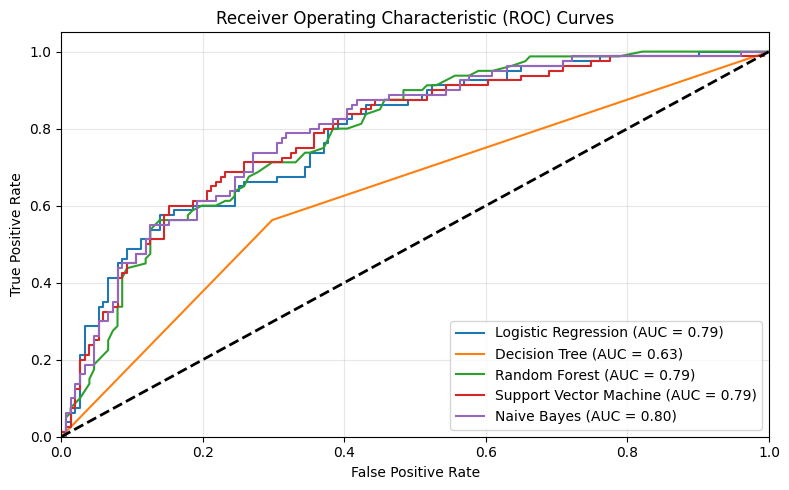

In [46]:

# Plot ROC curves for each model
plt.figure(figsize=(8, 5))

# Iterate over each model
for name, model in best_models.items():
    # Get predicted probabilities for the positive class
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Set plot labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)

# Show plot
plt.tight_layout()
plt.show()


## Feature Importance 

### SVC Feature Importance

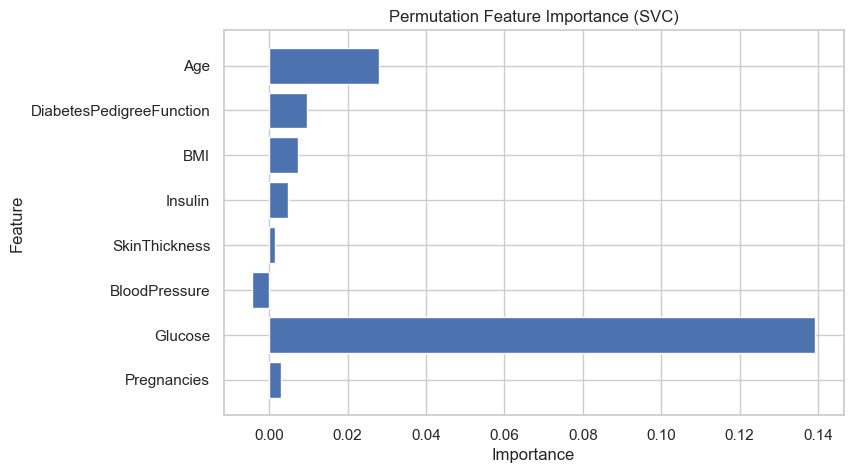

In [42]:
from sklearn.inspection import permutation_importance

#  SVC with non-linear kernel was one of the best models
svc_model = best_models['SVC']

# Calculate permutation feature importance
result = permutation_importance(svc_model, X_train, y_train, n_repeats=10, random_state=42)

# Get feature importances
importances = result.importances_mean

# Get feature names
features = X_train.columns

# Plot the feature importances
plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance (SVC)')
plt.show()

### Random Forest feature Importance

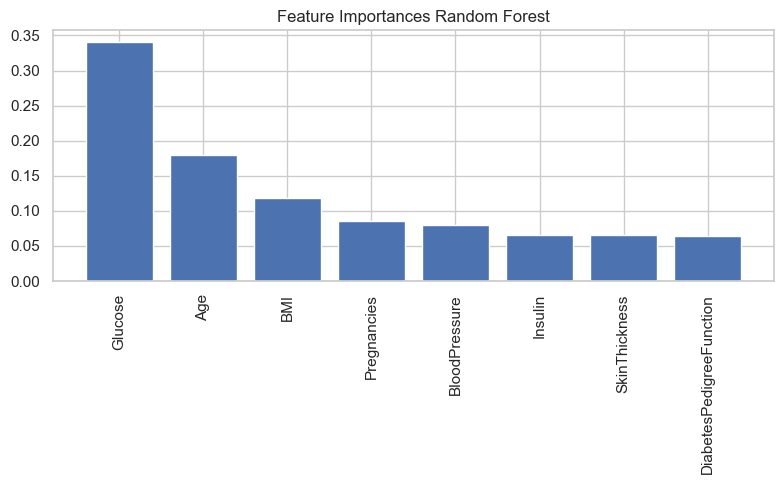

In [44]:
rf_model = best_models['RandomForest']

# Get feature importances from the random forest model
feature_importances = rf_model.feature_importances_
features = X_train.columns
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(8, 5))
plt.title("Feature Importances Random Forest")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()


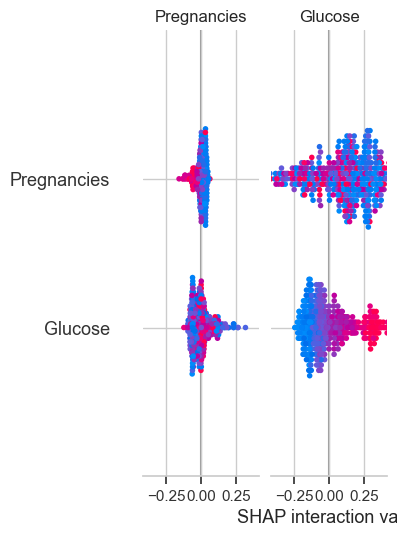

In [56]:
import shap
import matplotlib.pyplot as plt

# Assuming RandomForest was one of the best models
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train)

# Plot the feature importances using SHAP with specified size
shap.summary_plot(shap_values, X_train, show=False)
plt.gcf().set_size_inches(10, 5)
plt.show()


### SHAP Values for Model Interpretation

### SHAP (SHapley Additive exPlanations) values provide a unified measure of feature importance. It can be used for any model, including tree-based models like RandomForest or linear models like Logistic Regression.

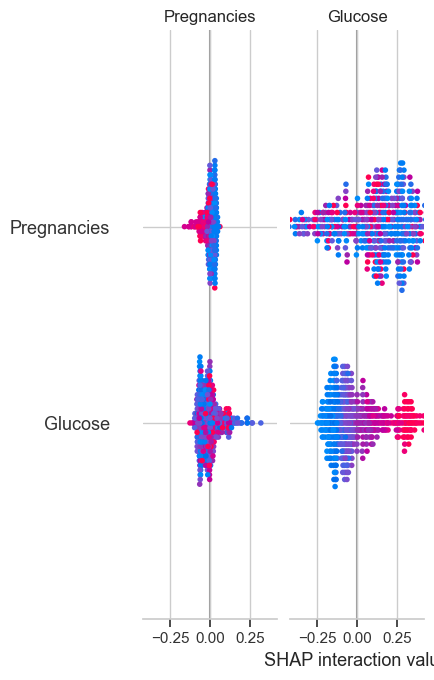

In [47]:
import shap

# Assuming RandomForest was one of the best models
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train)

# Plot the feature importances using SHAP
shap.summary_plot(shap_values, X_train)


### Logistic Regression Feature Importance

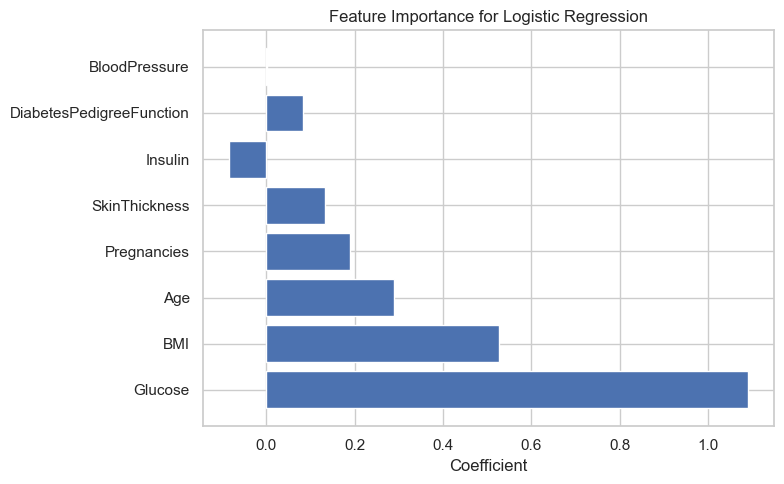

In [57]:
lr_model = best_models['LogisticRegression']

# Get the coefficients and feature names
coefficients = lr_model.coef_[0]
features = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of the coefficients
importance_df['abs_Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='abs_Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(8, 5))
plt.title("Feature Importance for Logistic Regression")
plt.barh(importance_df['Feature'], importance_df['Coefficient'])
plt.xlabel('Coefficient')
plt.tight_layout()
plt.show()


### Naive Bayes Feature Importance

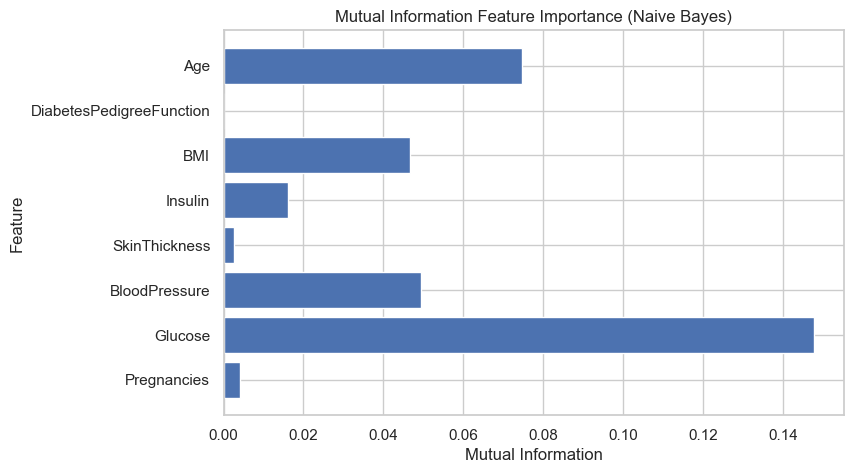

In [58]:
from sklearn.feature_selection import mutual_info_classif

# For Naive Bayes 
nb_model = best_models['NaiveBayes']

# Calculate mutual information between each feature and the target
mi_scores = mutual_info_classif(X_train, y_train)

# Get feature names
features = X_train.columns

# Plot the feature importances
plt.figure(figsize=(8,5))
plt.barh(features, mi_scores)
plt.xlabel('Mutual Information')
plt.ylabel('Feature')
plt.title('Mutual Information Feature Importance (Naive Bayes)')
plt.show()


### Decision Tree Feature Importance

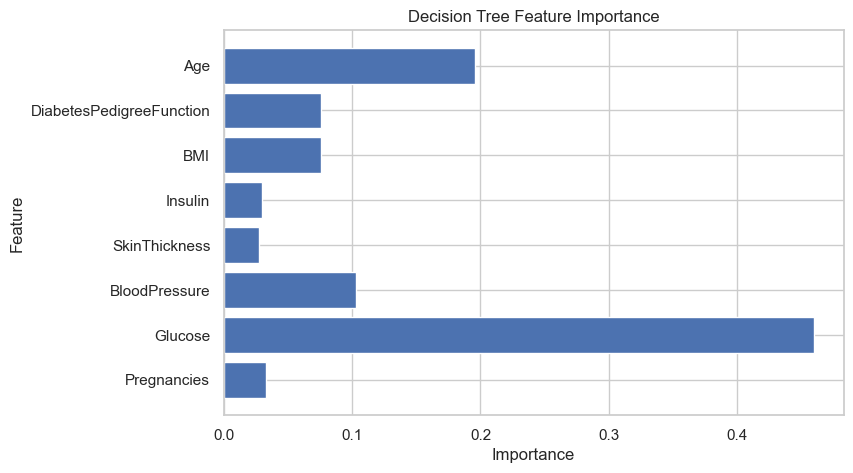

In [59]:
# For Decision Tree 
dt_model = best_models['DecisionTree']

# Get feature importances
importances = dt_model.feature_importances_

# Get feature names
features = X_train.columns

# Plot the feature importances
plt.figure(figsize=(8,5))
plt.barh(features, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.show()
